# Ford GoBike Share Data 2018 - Exploration and Analysis

## by Indrani Purkayastha


## Investigation Overview

  
The Bike Share system allows users to rent bicycles for short journeys between stations throughout the city (https://www.fordgobike.com/system-data). Users can either join as an Annual Member (Subscribers) or purchase a Single Ride or Access Pass (Customers). They can pick up a bike at one of the stations whenever they need one, and drop it off at any other station when you’re done with their ride. 

This data set from Ford GoBike includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during 2018. Each trip data is anonymized and is provided for public use. Here, we analyze the data from rides between January 1, 2018 and December 31, 2018 and identify trends and interesting insights.

## Dataset Overview

The Ford GoBike Share Data is available as a separate csv file for each month on the Ford GoBike website. In this project, twelve separate csv files for each of the 12 months from January 2018 to December 2018 are downloaded.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preliminary Wrangling

The input files are provided separately for each month. Therefore for our analysis, we need to combine the 12 separate files into a single dataframe providing information for the entire year 2018. We therefore set up a for-loop to read in each file separately to a dataframe. The multiple dataframes are concatenated into a dataframe for the entire year.

In [2]:
datafiles = ["201801-fordgobike-tripdata.csv",\
             "201802-fordgobike-tripdata.csv",\
             "201803-fordgobike-tripdata.csv",\
             "201804-fordgobike-tripdata.csv",\
             "201805-fordgobike-tripdata.csv",\
             "201806-fordgobike-tripdata.csv",\
             "201807-fordgobike-tripdata.csv",\
             "201808-fordgobike-tripdata.csv",\
             "201809-fordgobike-tripdata.csv",\
             "201810-fordgobike-tripdata.csv",\
             "201811-fordgobike-tripdata.csv",\
             "201812-fordgobike-tripdata.csv"]

In [3]:
df_input = pd.DataFrame()

In [4]:
for datafile in datafiles:
    df1 = pd.read_csv(datafile)
    df_input = pd.concat([df_input,df1],ignore_index = True)
    print("Number of rows in df after loading {} is {}".format(datafile,df_input.shape[0]))

Number of rows in df after loading 201801-fordgobike-tripdata.csv is 94802
Number of rows in df after loading 201802-fordgobike-tripdata.csv is 201520
Number of rows in df after loading 201803-fordgobike-tripdata.csv is 312902
Number of rows in df after loading 201804-fordgobike-tripdata.csv is 444071
Number of rows in df after loading 201805-fordgobike-tripdata.csv is 623196
Number of rows in df after loading 201806-fordgobike-tripdata.csv is 819164
Number of rows in df after loading 201807-fordgobike-tripdata.csv is 1018386
Number of rows in df after loading 201808-fordgobike-tripdata.csv is 1210548
Number of rows in df after loading 201809-fordgobike-tripdata.csv is 1396765
Number of rows in df after loading 201810-fordgobike-tripdata.csv is 1598223
Number of rows in df after loading 201811-fordgobike-tripdata.csv is 1732358
Number of rows in df after loading 201812-fordgobike-tripdata.csv is 1863721


In [5]:
#examine the dataset format
df_input.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [6]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


**We will make a copy of this original dataset prior to making any changes, and perform our cleaning and analysis on this copy.**

In [7]:
df = df_input.copy()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


  
  

**We will now wrangle and clean the dataset so as to make it tidy for our analysis purpose. The steps that we will follow are:**

1) delete the columns not required for analysis : start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude

2) Convert the incorrect datatypes for the following columns:

start_time, end_time : Convert these columns into 'datetime' datatypes, and split into two separate columns for date and time.

start_station_id, end_station_id : convert to integers

user_type, member_gender: convert to category

member_birth_year: convert to integer

In [8]:
#delete redundant columns
columns_to_be_dropped = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_share_for_all_trip','bike_id']
df = df.drop(columns_to_be_dropped, axis=1)

In [9]:
from datetime import datetime

#convert datatypes to datetime
start_datetime = pd.to_datetime(df.start_time, errors='coerce')
end_datetime = pd.to_datetime(df.end_time, errors='coerce')

#split each column into separate date and time columns and include another column for the hour of the day
df = df.assign(start_date=start_datetime.dt.date, start_time=start_datetime.dt.time)
df = df.assign(end_date=end_datetime.dt.date, end_time=end_datetime.dt.time)
df = df.assign(hour_of_day=start_datetime.dt.hour)

In [10]:
#convert incorrect datatypes to correct datatypes
df['start_station_id']=df['start_station_id'].fillna(0).astype(int)
df['end_station_id']=df['end_station_id'].fillna(0).astype(int)
df['member_birth_year']=df['member_birth_year'].fillna(0).astype(int)
df['user_type']=df['user_type'].astype('category')
df['member_gender']=df['member_gender'].astype('category')

We now check the dataframe and confirm the changes.

In [11]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,start_date,end_date,hour_of_day
273297,270,16:14:25.406000,16:18:55.687000,49,S Park St at 3rd St,27,Beale St at Harrison St,Subscriber,1982,Male,2018-03-12,2018-03-12,16
972790,348,12:00:29.362000,12:06:17.844000,133,Valencia St at 22nd St,98,Valencia St at 16th St,Subscriber,1994,Female,2018-07-09,2018-07-09,12
521443,423,07:38:34.121000,07:45:37.549000,15,San Francisco Ferry Building (Harry Bridges Pl...,6,The Embarcadero at Sansome St,Subscriber,1963,Female,2018-05-18,2018-05-18,7
1329651,921,14:49:26.614000,15:04:48.409000,89,Division St at Potrero Ave,37,2nd St at Folsom St,Subscriber,1965,Male,2018-09-12,2018-09-12,14
1776202,1620,21:01:09.720000,21:28:10.274000,95,Sanchez St at 15th St,323,Broadway at Kearny,Customer,1995,Male,2018-12-18,2018-12-18,21


We now rearrange the columns according to our convenience.

In [12]:
cols = list(df.columns.values)
cols

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'user_type',
 'member_birth_year',
 'member_gender',
 'start_date',
 'end_date',
 'hour_of_day']

In [13]:
df = df[['start_date','start_time','end_date','end_time','hour_of_day','duration_sec',\
               'start_station_id','start_station_name','end_station_id','end_station_name',\
               'user_type', 'member_birth_year','member_gender']]

In [14]:
df.sample(5)

,start_date,start_time,end_date,end_time,hour_of_day,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender
1217850,2018-09-29,11:59:04.009000,2018-09-29,12:28:44.834000,11,1780,21,Montgomery St BART Station (Market St at 2nd St),285,Webster St at O'Farrell St,Subscriber,1965,Male
1081678,2018-08-21,19:33:34.486000,2018-08-21,19:40:22.395000,19,407,41,Golden Gate Ave at Polk St,88,11th St at Bryant St,Subscriber,1986,Male
884768,2018-07-21,20:55:32.618000,2018-07-21,21:03:24.155000,20,471,36,Folsom St at 3rd St,5,Powell St BART Station (Market St at 5th St),Subscriber,1958,Other
1043997,2018-08-28,09:04:25.042000,2018-08-28,09:18:24.866000,9,839,120,Mission Dolores Park,80,Townsend St at 5th St,Customer,1988,Male
347329,2018-04-24,15:03:10.309000,2018-04-24,15:15:39.718000,15,749,27,Beale St at Harrison St,78,Folsom St at 9th St,Subscriber,1980,Male


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 13 columns):
start_date            object
start_time            object
end_date              object
end_time              object
hour_of_day           int64
duration_sec          int64
start_station_id      int32
start_station_name    object
end_station_id        int32
end_station_name      object
user_type             category
member_birth_year     int32
member_gender         category
dtypes: category(2), int32(3), int64(2), object(6)
memory usage: 138.6+ MB


In [16]:
df.describe()

,hour_of_day,duration_sec,start_station_id,end_station_id,member_birth_year
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,1.351437e+01,8.573026e+02,1.189186e+02,1.174266e+02,1.865279e+03
std,4.742223e+00,2.370379e+03,1.005281e+02,1.005593e+02,4.688814e+02
min,0.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,3.500000e+02,3.000000e+01,3.000000e+01,1.975000e+03
50%,1.400000e+01,5.560000e+02,8.800000e+01,8.700000e+01,1.985000e+03
75%,1.700000e+01,8.720000e+02,1.830000e+02,1.830000e+02,1.990000e+03
max,2.300000e+01,8.636600e+04,3.810000e+02,3.810000e+02,2.000000e+03


### What is the structure of your dataset?

There are 1863721 records in the dataset. The cleaned dataset contains 12 features for each bike ride record in the dataset duration_sec, start_date, start_time, end_date, end_time, start_station_id, start_station_name, end_station_id, end_station_name, user_type, member_birth_year, member_gender). Of these, user type and member gender are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

I'm interested to use this dataset to find out how, when, where and by whom the bike share is mostly used. Using the data, I'd like to analyse and find the answers to the following questions:

1. What is the duration of a bike ride, on an average?

2. What is the total number of bike share rides in a year? Does the number of rides vary between the months/ seasons?Is there any noticeable trend that can be observed in the use over the months? Which is the busiest month of the year and which is the calmest?

3. Is there any trend between the bike use on different days of the week, particularly between weekdays and weekends? Which is the busiest and less busy days of the week, if any?

4. Are there any differences of behavior that can be observed amongst customers and subscribers? Can any inferences be drawn from these?

5. Which are the most popular starting stations and end stations? Which are the least popular ones?

6. How do the number of users vary by age? Is the bike share system more popular among any particular age group?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that there will be variation in the number of bike share users during different months and days of the week. There are likely to be more busy times and less busy times, more popular stations or less popular ones. I expect there will be differences in trends in bike uses between subscribers (who hold a membership plan and use the service on a regular basis) and customers (who purchase a single ride or a access pass for a short duration). 



## Univariate Exploration

> In this section, we investigate distributions of individual variables and look for any outliers.

### Duration of bike rides

**We would like to find out how the bike service is used in order to answer the following questions:**

**- Do most users use the service for short trips or longer ones?**


**- What is the most common time duration for which a bike is rented?**

#### Duration of bike rides in seconds

We'll start by looking at the distribution of the duration of bike rides. From the statistical parameters obtained, we can see that the minimum duration is 61 seconds and the maximum duration is 86366 seconds. The mean is 857 seconds and more than 75% of the observations are below 872 seconds. The mean duration is so we'll look at the distribution by dividing the observations into bins of size 200 and plotting a histogram.

In [17]:
df['duration_sec'].describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

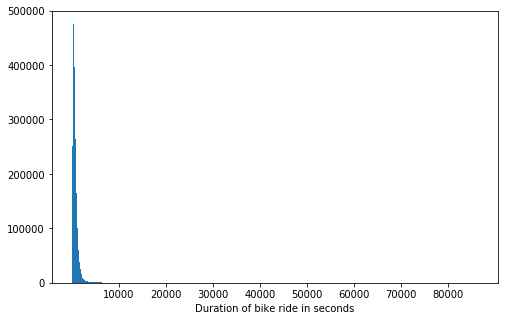

In [18]:
binsize = 200
bins = np.arange(60, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of bike ride in seconds')
plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000])
plt.show()

From this plot we can observe that most of the data points lie to the far left of their axes, suggesting some strong outliers on the right. Most of the observations are between around 0-10000 seconds whereas there are few outliers beyond this range. Therfore, we can change our axis limits to focus our observations on the range of our interest where most of our observation points lie.

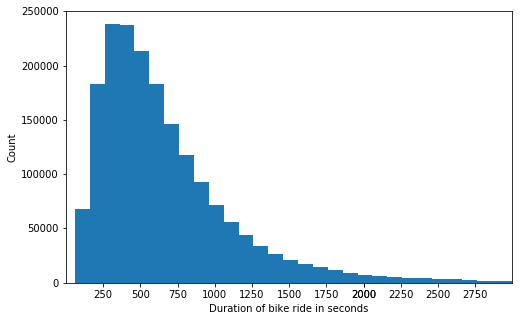

In [19]:
binsize = 100
bins = np.arange(60, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of bike ride in seconds')
plt.ylabel('Count')
plt.xlim(0,3000)
plt.xticks([250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,2000])
plt.show()

**As it is difficult for us to carry out our analysis with the time unit in seconds, we will plot the same figures but in units of minutes instead of in seconds. For this purpose we will add a new variable to our dataframe called 'duration_minutes', which will have a value given be duration_sec/60. We will now plot the same data with the duration unit in minutes.**

#### Duration of Bike Rides in minutes

In [20]:
df['duration_minutes']= df['duration_sec']/60
df.sample(5)

,start_date,start_time,end_date,end_time,hour_of_day,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,duration_minutes
730128,2018-06-14,18:05:08.239000,2018-06-14,18:12:18.014000,18,429,124,19th St at Florida St,223,16th St Mission BART Station 2,Subscriber,1990,Male,7.150000
1128578,2018-08-14,08:58:29.889000,2018-08-14,09:04:21.038000,8,351,139,Garfield Square (25th St at Harrison St),141,Valencia St at Cesar Chavez St,Subscriber,1990,Female,5.850000
1807731,2018-12-12,19:20:59.904000,2018-12-12,19:30:27.677000,19,567,22,Howard St at Beale St,92,Mission Bay Kids Park,Subscriber,1986,Male,9.450000
1808310,2018-12-12,18:14:26.962000,2018-12-12,18:24:35.932000,18,608,11,Davis St at Jackson St,49,S Park St at 3rd St,Subscriber,1977,Male,10.133333
1084892,2018-08-21,13:25:59.938000,2018-08-21,13:38:13.326000,13,733,6,The Embarcadero at Sansome St,21,Montgomery St BART Station (Market St at 2nd St),Customer,0,NaN,12.216667


In [21]:
df['duration_minutes'].describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_minutes, dtype: float64

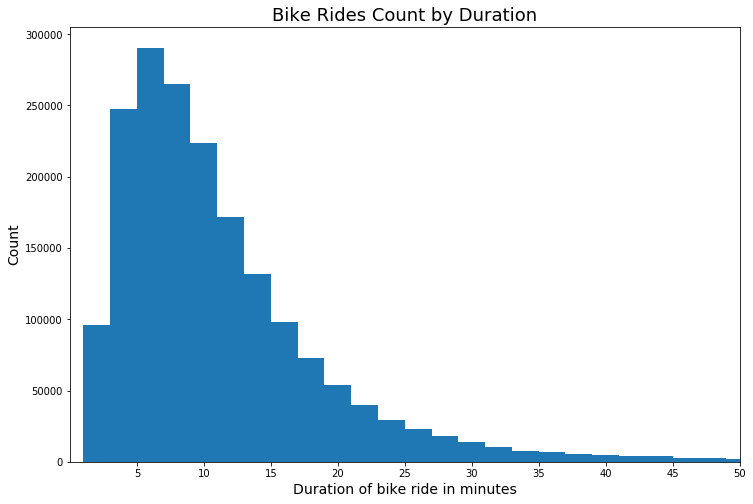

In [22]:
binsize = 2
bins = np.arange(1, df['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[12, 8])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xlabel('Duration of bike ride in minutes',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Bike Rides Count by Duration',fontsize=18)
plt.xlim(0,50)
plt.xticks([5,10,15,20,25,30,35,40,45,50])
plt.show()

In [23]:
# select high outliers, using criteria eyeballed from the plots. Here we select those which have duration > 200 minutes

high_outliers = ((df['duration_minutes'] > 200))
print(high_outliers.value_counts())
pd.DataFrame((df.loc[high_outliers,:]))

False    1856681
True        7040
Name: duration_minutes, dtype: int64


,start_date,start_time,end_date,end_time,hour_of_day,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,duration_minutes
0,2018-01-31,22:52:35.239000,2018-02-01,19:47:19.824000,22,75284,120,Mission Dolores Park,285,Webster St at O'Farrell St,Subscriber,1986,Male,1254.733333
1,2018-01-31,16:13:34.351000,2018-02-01,15:57:17.310000,16,85422,15,San Francisco Ferry Building (Harry Bridges Pl...,15,San Francisco Ferry Building (Harry Bridges Pl...,Customer,0,NaN,1423.700000
2,2018-01-31,14:23:55.889000,2018-02-01,10:16:52.116000,14,71576,304,Jackson St at 5th St,296,5th St at Virginia St,Customer,1996,Male,1192.933333
3,2018-01-31,14:53:23.562000,2018-02-01,07:51:20.500000,14,61076,75,Market St at Franklin St,47,4th St at Harrison St,Customer,0,NaN,1017.933333
4,2018-01-31,19:52:24.667000,2018-02-01,06:58:31.053000,19,39966,74,Laguna St at Hayes St,19,Post St at Kearny St,Subscriber,1991,Male,666.100000
85,2018-01-31,18:09:22.537000,2018-01-31,22:08:49.392000,18,14366,250,North Berkeley BART Station,259,Addison St at Fourth St,Subscriber,1979,Male,239.433333
86,2018-01-31,18:45:53.099000,2018-01-31,22:08:40.150000,18,12167,64,5th St at Brannan St,58,Market St at 10th St,Customer,1989,Male,202.783333
655,2018-01-31,13:18:38.739000,2018-01-31,19:07:25.778000,13,20927,15,San Francisco Ferry Building (Harry Bridges Pl...,6,The Embarcadero at Sansome St,Customer,0,NaN,348.783333
657,2018-01-31,13:18:09.755000,2018-01-31,19:07:14.091000,13,20944,15,San Francisco Ferry Building (Harry Bridges Pl...,6,The Embarcadero at Sansome St,Customer,0,NaN,349.066667
746,2018-01-31,06:01:40.813000,2018-01-31,18:52:39.958000,6,46259,41,Golden Gate Ave at Polk St,5,Powell St BART Station (Market St at 5th St),Customer,0,NaN,770.983333


**Observation: Bike ride duration thus has a long-tailed distribution and is right-skewed. Most of the observations lie in between 1-50 minutes. The observations steeply increase from 0, maximum number of rides are between 5-10 minutes long and then gradually decline.  The observations beyond 200 minutes can be considered as outliers. We will try to identify these outliers and see if they need to be filtered out of the data. We will further investigate if the duration also varies by user groups and by day of week.**

### Rides by Month



I'll next have a look at the distribution of the bike rides by months, to see if there is uniformity throughout the year, or if particular months are more busy or less busy than others.

To analyse by months and day of the week, we will first need to find the month and day of the week from the given date. We add two new columns 'month' and 'dayof week' to our dataframe. Initially these columns are populated with the digits corresponding to the month and day, that is, for month column, we have 1 for January, 2 for February and so on. Similarly we have 0 for Monday, 1 for Tuesday and so on for days of the week. Then these values are further formatted to display the month name (first three characters) and the day of the week

In [24]:
import calendar
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = df['start_date'].dt.month
df['dayofweek'] = df['start_date'].dt.dayofweek

In [25]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['dayofweek'] = pd.to_datetime(df['start_date'], format='%m/%d/%y').dt.weekday_name

In [26]:
df.sample(5)

,start_date,start_time,end_date,end_time,hour_of_day,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,duration_minutes,month,dayofweek
20180,2018-01-26,13:06:54.864000,2018-01-26,13:17:08.737000,13,613,245,Downtown Berkeley BART,274,Oregon St at Adeline St,Subscriber,1946,Male,10.216667,Jan,Friday
906796,2018-07-18,17:49:10.306000,2018-07-18,17:55:32.972000,17,382,11,Davis St at Jackson St,22,Howard St at Beale St,Subscriber,1967,Male,6.366667,Jul,Wednesday
1017461,2018-07-01,11:55:51.434000,2018-07-01,12:39:43.848000,11,2632,197,El Embarcadero at Grand Ave,197,El Embarcadero at Grand Ave,Customer,1986,Male,43.866667,Jul,Sunday
266631,2018-03-14,17:38:37.010000,2018-03-14,17:45:12.338000,17,395,59,S Van Ness Ave at Market St,44,Civic Center/UN Plaza BART Station (Market St ...,Subscriber,1985,Female,6.583333,Mar,Wednesday
437874,2018-04-02,17:59:57.576000,2018-04-02,18:14:57.756000,17,900,42,San Francisco City Hall (Polk St at Grove St),133,Valencia St at 22nd St,Subscriber,1986,Female,15.000000,Apr,Monday


We then use a bar plot to explore the distribution of the bike rides by months.

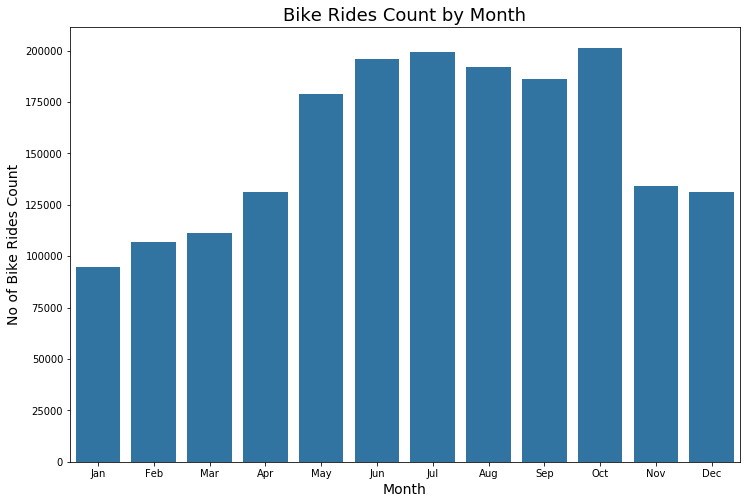

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='month',color = base_color);
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.title('Bike Rides Count by Month',fontsize=18)
plt.gcf().set_size_inches(12,8)

**Observation: We observe that there is an increase in the number of rides during the summer and this number falls during the winter months. The maximum activity is observed in the period between May to October. There is a sharp decline in the number of users between November and January, and then it gradually starts increasing again during the spring months. The peak numbers are observed in July and October**

### Rides by Day of the week

Next we observe the distribution by day of the week.

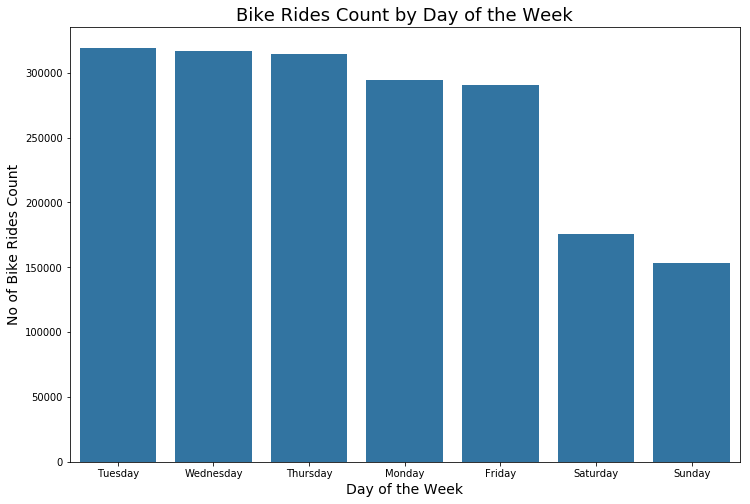

In [28]:
base_color = sb.color_palette()[0]
dayofweek_order = df['dayofweek'].value_counts().index
sb.countplot(data=df, x='dayofweek',color = base_color,order = dayofweek_order);
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Day of the Week',fontsize=14)
plt.title('Bike Rides Count by Day of the Week',fontsize=18)
plt.gcf().set_size_inches(12,8)

**Observation: Usage is much more on weekdays and drops substantially on weekends. The highest activity is recorded mid-week between Tuesdays and Thursdays, whereas the lowest activity is seen on Sundays. We will further explore this behavior of weekday and weekend use between different user groups.**

### Rides by Hour

We observe the bike usage throughout the day.

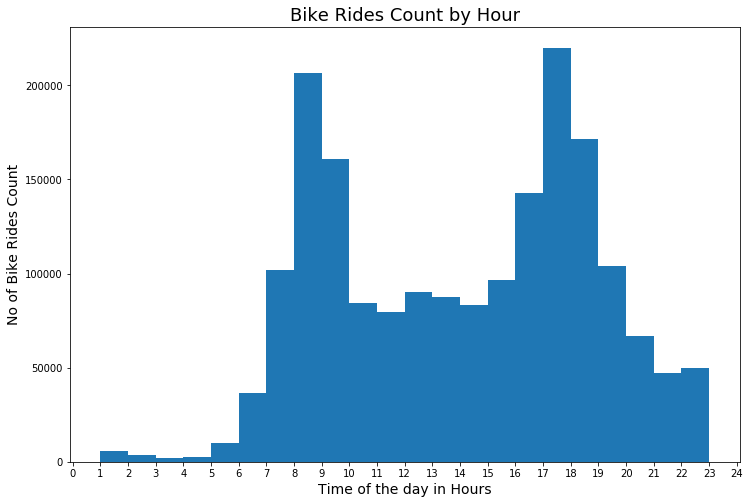

In [29]:
binsize = 1
bins = np.arange(1, df['hour_of_day'].max()+binsize, binsize)
plt.figure(figsize=[12, 8])
plt.hist(data = df, x = 'hour_of_day', bins = bins)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Time of the day in Hours',fontsize=14)
plt.title('Bike Rides Count by Hour',fontsize=18)
plt.gcf().set_size_inches(12,8)

**Observation: We see that there is less activity during the early morning hours. We see spikes between 8am-9am, and between 5pm-6pm(17-18 hours). This indicates peak activity amongst users while commuting to and from work. There is a small increase at noon which could indicate lunchtime use. Usage falls before and after the peak hours. We will further investigate this behavior between different user groups.**

### Most Popular Stations



We have a look at the stations which have the highest number of users starting or ending their journey at that station.

**Most Popular Starting Stations**

In [30]:
df_start = pd.DataFrame(df['start_station_name'].value_counts().head(10)).reset_index()
df_start.columns = ["Start Station Name", "Number of Rides"]
df_start

,Start Station Name,Number of Rides
0,San Francisco Ferry Building (Harry Bridges Pl...,38461
1,San Francisco Caltrain Station 2 (Townsend St...,37617
2,San Francisco Caltrain (Townsend St at 4th St),35092
3,Market St at 10th St,34918
4,Berry St at 4th St,33716
5,The Embarcadero at Sansome St,33390
6,Montgomery St BART Station (Market St at 2nd St),32131
7,Powell St BART Station (Market St at 4th St),31656
8,Steuart St at Market St,28367
9,Howard St at Beale St,26535


**Most Popular Destination Stations**

In [31]:
df_end = pd.DataFrame(df['end_station_name'].value_counts().head(10)).reset_index()
df_end.columns = ["Destination Station Name", "Number of Rides"]
df_end

,Destination Station Name,Number of Rides
0,San Francisco Caltrain Station 2 (Townsend St...,50000
1,San Francisco Ferry Building (Harry Bridges Pl...,44113
2,San Francisco Caltrain (Townsend St at 4th St),42970
3,The Embarcadero at Sansome St,39222
4,Montgomery St BART Station (Market St at 2nd St),35955
5,Market St at 10th St,34365
6,Powell St BART Station (Market St at 4th St),33086
7,Berry St at 4th St,32786
8,Steuart St at Market St,28592
9,Powell St BART Station (Market St at 5th St),26002


### Rides by Subscribers Vs Customers

**Determine who are the main users of the service:**

- **Who uses the service more frequently - Subscribers or Customers?**


- **What is the proportion of the number of Subscribers and Customers?**

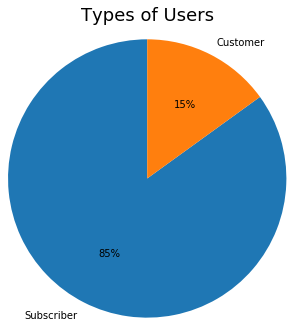

In [54]:
plt.pie(df['user_type'].value_counts(), labels = df['user_type'].value_counts().index,startangle = 90,radius =1.6,autopct='%1.0f%%');
plt.title('Types of Users',fontsize=18, y=1.2);

**Observation: Most users (approximately 85%) are Subscribers who have an annual membership plan. Only 15% approximately are Customers, who have purchased a Single Ride or Access Pass.**

### Rides by Age Group of Users

**Find out the age group of people who use the service:**


- **What is the age group of the users?**


- **Is the service more popular among a particular age group?**

We'll next check out the distribution of riders by their age group. We introduce a new column in the dataframe called **'age'**. The age is obtained by subtracting the Year of Birth from 2018 (the year when the data is recorded). 

In [33]:
df['age']= 2018 - df['member_birth_year']

In [34]:
df.sample(5)

,start_date,start_time,end_date,end_time,hour_of_day,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,duration_minutes,month,dayofweek,age
1100191,2018-08-18,14:20:34.004000,2018-08-18,14:36:23.436000,14,949,241,Ashby BART Station,265,Ninth St at Parker St,Customer,1996,Male,15.816667,Aug,Saturday,22
1398304,2018-10-31,18:08:16.846000,2018-10-31,18:25:58.841000,18,1061,126,Esprit Park,15,San Francisco Ferry Building (Harry Bridges Pl...,Subscriber,1968,Female,17.683333,Oct,Wednesday,50
357954,2018-04-21,23:38:22.578000,2018-04-21,23:43:55.264000,23,332,21,Montgomery St BART Station (Market St at 2nd St),10,Washington St at Kearny St,Subscriber,1995,Male,5.533333,Apr,Saturday,23
1130478,2018-08-13,21:03:52.568000,2018-08-13,21:09:21.242000,21,328,66,3rd St at Townsend St,37,2nd St at Folsom St,Subscriber,1975,Male,5.466667,Aug,Monday,43
1100826,2018-08-18,11:53:16.140000,2018-08-18,12:42:22.862000,11,2946,70,Central Ave at Fell St,70,Central Ave at Fell St,Customer,0,NaN,49.100000,Aug,Saturday,2018


In [35]:
df['age'].describe()

count    1.863721e+06
mean     1.527213e+02
std      4.688814e+02
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.300000e+01
max      2.018000e+03
Name: age, dtype: float64

We observe that the minimum age is 18. For the purposes of this analysis, we will assume that users who have a recorded age of > 100 either have filled in their Date of Birth incorrectly, or have not provided this information (example the users who had no Date of Birth recorded had a value of 0 in this column, therefore they have their age appearing as 2018). We will consider these points as outliers and exclude them from our analysis as they can be assumed to be incorrect data. We will focus on the age range 18-100 years

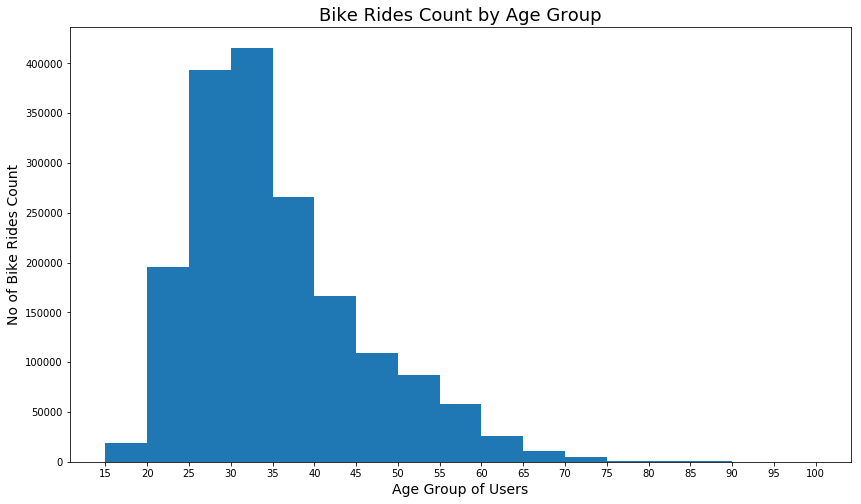

In [36]:
binsize = 5
bins = np.arange(15, 105, binsize)
plt.figure(figsize=[14, 8])
plt.hist(data = df, x = 'age', bins = bins)
plt.xticks([15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Age Group of Users',fontsize=14)
plt.title('Bike Rides Count by Age Group',fontsize=18)
plt.show()

**Observation: We observe that most of the data points lie in the range of 20-60 years age. The distribution follows a bell curve skewed towards the right. Maximum users fall within the 25-35 age bracket, and then the numbers gradually falls off with age. There are very few users aged above 75.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


### Key Insights

1. Bike ride duration has a long-tailed distribution and is right-skewed, with a peak between 5-8 minutes which then gradually falls off. There are few outliers > 200 minutes which may need to be looked at separately.


2. Bike ride count by month shows increased usage during the summer months between May and October, with a decrease in use during the other months.


3. Bike ride usage by day of the week shows usage is much more on weekdays and drops substantially on weekends. The highest activity is recorded mid-week between Tuesdays and Thursdays, whereas the lowest activity is seen on Sundays. 


4. Bike ride usage by hour shows spikes between 8am-9am, and between 5pm-6pm, which indicates peak activity amongst users while commuting to and from work. There is a small increase at noon which could indicate lunchtime use. Usage falls before and after the peak hours, with less activity during the night and early morning hours. 


5. There are a number of stations which are popular both as the origin and destination points of journeys.


6. Most users (approximately 85%) are subscribers, and only 15% approximately are customers.


7. Bike ride usage by age group show that most users are between 20-60 years age. The distribution follows a bell curve skewed towards the right. Maximum users fall within the 25-35 age bracket, and then the numbers gradually falls off with age. Users who have not provided their date of birth or provided an incorrect one (which can be assumed for users having age > 100) are  not considered for age analysis as these can be assumed to be incorrect entries.




### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The outliers that were identified for Bike Ride Duration and Age variables, were excluded while analysing their distributions.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the data, following on from the variables that were introduced earlier in the Univariate Exploration section.

We will attempt to explore the relationship between User Type (Subscriber/ Consumer) and the Bike Ride Duration, Usage by Days of the week and Hourly Usage.

### Rides by Duration and Customer Type

**Investigate differences in behavior between Subscribers and Customers with respect to their usage durations:**


- **Who takes longer rides - Subscribers or Customers?**


- **What is the median trip duration for Subscribers and for Customers?**

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-20.0, 250.0)

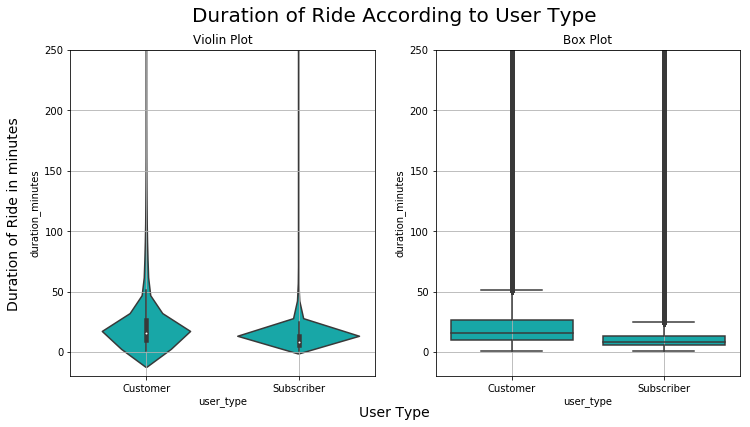

In [37]:
base_color = sb.color_palette()[0]
fig = plt.figure(figsize = [12, 6])
fig.suptitle("Duration of Ride According to User Type",size = 20)
fig.text(0.5, 0.04, 'User Type', ha='center', va='center',size = 14)
fig.text(0.06, 0.5, 'Duration of Ride in minutes', ha='center', va='center', rotation='vertical',size = 14)


# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'user_type', y = 'duration_minutes', color = "c");
ax1.title.set_text('Violin Plot')
plt.grid(True)
plt.ylim(-20,250);

# right plot: box plot
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data = df, x = 'user_type', y = 'duration_minutes', color= "c");
ax2.title.set_text('Box Plot')
plt.grid(True)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot;

**To have a better understanding of the data, we will repeat the same analysis by excluding outliers having ride duration > 200 minutes**

(0.0, 70.0)

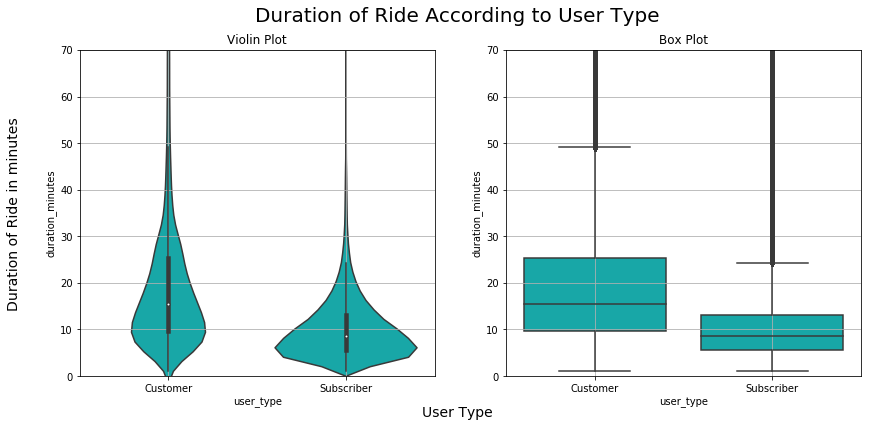

In [38]:
df_duration = df[df['duration_minutes'] < 200] # exclude outliers in the dataset with duration >200 minutes
base_color = sb.color_palette()[0]
fig = plt.figure(figsize = [14, 6])
fig.suptitle("Duration of Ride According to User Type",size = 20)
fig.text(0.5, 0.04, 'User Type', ha='center', va='center',size = 14)
fig.text(0.06, 0.5, 'Duration of Ride in minutes', ha='center', va='center', rotation='vertical',size = 14)

# left plot: violin plot
plt.subplot(1, 2, 1);
ax1 = sb.violinplot(data = df_duration, x = 'user_type', y = 'duration_minutes', color = "c");
ax1.title.set_text('Violin Plot')
plt.grid(True);
plt.ylim(0,70);

# right plot: box plot
plt.subplot(1, 2, 2);
ax2 = sb.boxplot(data = df_duration, x = 'user_type', y = 'duration_minutes', color = "c");
ax2.title.set_text('Box Plot')
plt.grid(True);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot;

**Observation: We notice that the duration of trip, on an average, is higher for customers than for subscribers. The median trip duration for subscribers is around 9 minutes, whereas for subscribers it is higher at around 15 minutes. Moreover, only very few subscribers take longer than 30 minutes as compared to customers. Also, longer trips exceeding 30 minutes are more likely undertaken by customers instead of subscribers.**

### Rides by Day of Week and Customer Type

**Explore usage trends during the week:**


- **How does the Subscriber usage vary over the week? Are there any noticeable differences between weekdays and weekends use?**


- **How does the Customer usage vary over the week? Are there any noticeable differences between weekdays and weekends use?**

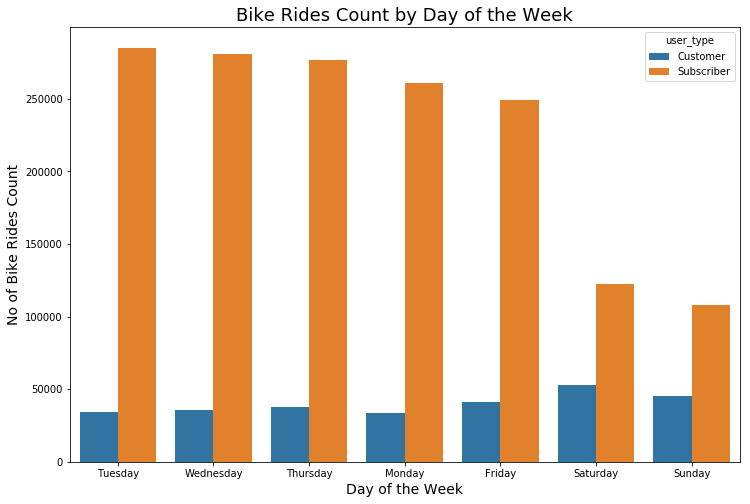

In [39]:
dayofweek_order = df['dayofweek'].value_counts().index
sb.countplot(data = df, x = 'dayofweek', hue = 'user_type',order = dayofweek_order)
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Day of the Week',fontsize=14)
plt.title('Bike Rides Count by Day of the Week',fontsize=18)
plt.gcf().set_size_inches(12,8);

**Observation: Most trips on weekdays are undertaken by subscribers, customers constitute a much smaller chunk of users on weekdays. However, the number of subscribers falls off substantially on weekends, while the number of customers increases on weekends.**

### Rides by Hour of the Day and Customer Type

**Analyse how the service is utilised throughout the day:**


- **How does the usage vary over the 24 hours of the day?**


- **Are there any fluctuations or peak times of usage?**

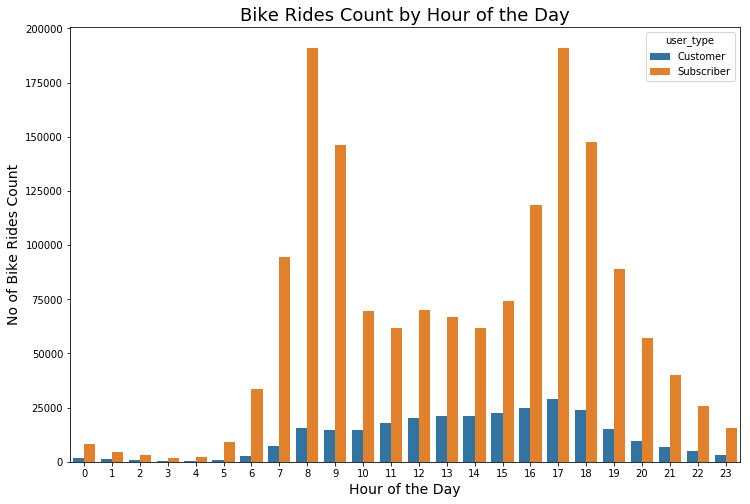

In [40]:
sb.countplot(data = df, x = 'hour_of_day', hue = 'user_type')
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Hour of the Day',fontsize=14)
plt.title('Bike Rides Count by Hour of the Day',fontsize=18)
plt.gcf().set_size_inches(12,8);

**Observation: For subscribers, we observe peak ride times at 8 am and 5 pm, with a much smaller peak at around noon. For customers, we notice that the usage shows an increasing trend as the day progresses, but the difference is less pronounced. It reaches a maximum between 4pm-6pm (16-18 hours) and then gradually falls off again.**

### Rides by Month and Customer Type

**Determine any Seasonal Impact on the use:**


- **Does usage remain uniform throughout the year?**


- **Are there any particular months when usage increases or decreases?**

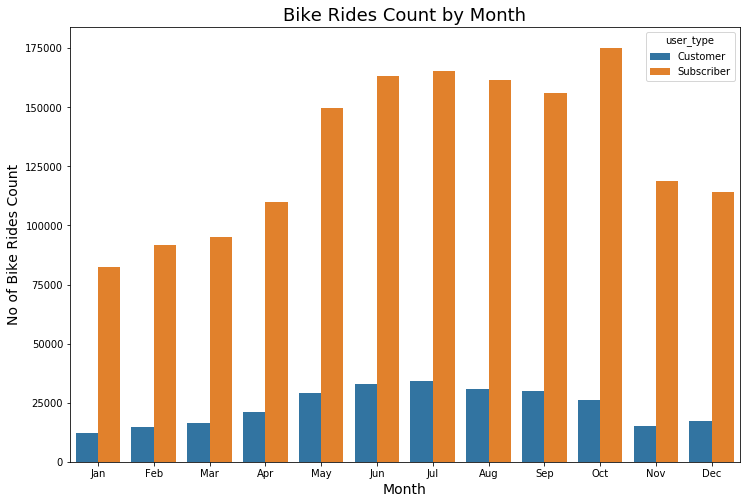

In [41]:
sb.countplot(data = df, x = 'month', hue = 'user_type')
plt.ylabel('No of Bike Rides Count',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.title('Bike Rides Count by Month',fontsize=18)
plt.gcf().set_size_inches(12,8);

**Observation: Both subscribers and customers show increasing usage during the summer months between May-October, and a decrease in use in the other months.**

### Relationships you observed in this part of the investigation


### Key Insights

1. Subscribers, on an average,take shorter duration rides compared to customers. 


2. The vast majority of users on weekdays are subscribers, whereas on weekends the number of subscribers decreases. The number of customers are more on weekends compared to weekdays. 


3.  For subscribers, the peak times 8 am and 5 pm, with a much smaller peak at around noon. For customers, there is an increasing trend as the day progresses, but the difference is less pronounced and maximum rides occur between 4pm-6pm (16-18 hours).


4. Bike ride count by month shows increased usage during the summer months between May and October, with a decrease in use during the other months for both subscribers and customers.


### Interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between the variables was as expected. An interesting observation was that the number of subscribers peaked during October.

## Multivariate Exploration

> In this section, we will analyse the relationship between three variables. We choose to look at the distribution of trip duration according to User Type and Day of the week.

### Duration of the Trip in minutes according to User Type and Day of the week.

**Determine behavior variation among Subscribers and Customers with respect to Duration of Trip and Day of the week:**


- **Is there any noticeable difference between median duration of trips undertaken by Subscribers and Customers?**



- **If there is a difference, then does this vary during the week?**

Text(0.5, 0.98, 'Bike Rides Duration by User Type and Day of the Week')

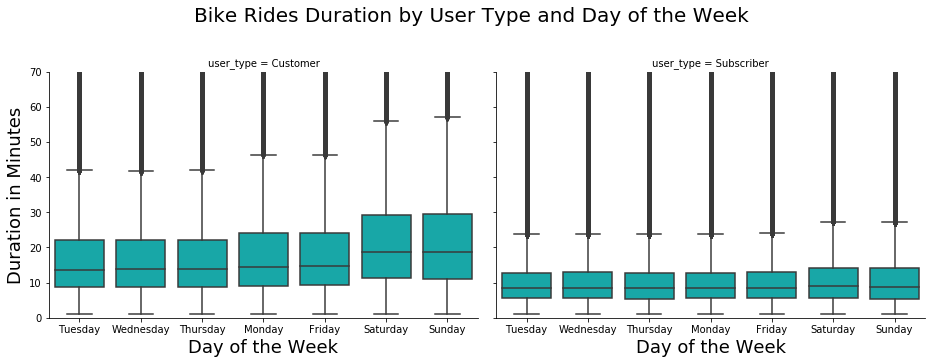

In [42]:
df_duration = df[df['duration_minutes'] < 200]
dayofweek_order = df['dayofweek'].value_counts().index
g = sb.FacetGrid(data = df_duration, col = 'user_type', height = 5,aspect=1.3,margin_titles=False)
plt.ylim(0,70)
g.map(sb.boxplot, 'dayofweek', 'duration_minutes', order = dayofweek_order,color="c");
g.set_xlabels('Day of the Week', size=18)
g.set_ylabels('Duration in Minutes', size=18)
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Bike Rides Duration by User Type and Day of the Week",size=20)

**Observation: It is observed that the median trip duration for subscribers remains more or less constant throughout the week at below 10 minutes. The median trip duration for customers remains higher than that of subscribers on all days of the week. However, this difference is greater on weekends than on weekdays. This can be explained by the longer trips undertaken by customers on weekends compared to weekdays.**

### Relationships you observed in this part of the investigation.  Were there any features that strengthened each other in terms of looking at your feature(s) of interest?

The findings in this section support our previous observations and are as expected. Most subscribers who purchase an annual membership, rent the bikes to ride to and from work and therefore, the median trip duration for subscribers remains more or less constant on all days. The average trip duration is also less than 10 minutes. However longer trips are undertaken by customers who purchase a single ride or short-term access pass. Customers, on an average, use the bikes for longer duration trips on weekends compared to weekdays. 

### Were there any interesting or surprising interactions between features?

We have derived some interesting insights from the dataset, however the overall findings are consistent with our expected results. 

## Key Findings and Insights.



- Bike ride duration has a long-tailed distribution and is right-skewed, with a peak between 5-8 minutes.


- Most users (approximately 85%) are subscribers, and only 15% approximately are customers.


-  Subscribers, on an average,take shorter duration rides compared to customers. 


- The vast majority of users on weekdays are subscribers, whereas on weekdays the number of subscribers decreases. The number of customers are more on weekends compared to weekdays. 


- For subscribers, the peak times 8 am and 5 pm, with a much smaller peak at around noon. For customers, there is an increasing trend as the day progresses, but the difference is less pronounced and maximum rides occur between 4pm-6pm (16-18 hours).


- Bike ride count by month shows increased usage during the summer months between May and October, with a decrease in use during the other months for both subscribers and customers.




## Resources:


https://stackoverflow.com/questions/47013973/pandas-converts-float64-to-int
https://stackoverflow.com/questions/41918115/how-do-i-extract-the-date-year-month-from-pandas-dataframe
https://stackoverflow.com/questions/39370879/extract-hour-from-timestamp-with-python
https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
https://stackoverflow.com/questions/39370584/how-do-you-add-an-overall-title-to-a-figure-with-subplots-in-matplotlib
https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots